# Project: Predicting Housing Prices in King County

We will use the **King County House Sales dataset**:  
[House Sales Prediction (Kaggle)](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

# Data Visualization

- **Contents**
    - Pearson Correlation heat map
    - Histogram
    - Comparison to price
    - Summary statistics
    - Spatial analysis: Price vs. lat/long
- **Top correlations to price**
    - Sqft_living (sqft_above + sqft_basement) is the strongest predictor (0.70). Outliers appear to follow linear relationship.
    - Grade is 2nd strongest correlation (0.67). 1-13 nominal rating. Appears to have a polynomial relationship with price.
    - Sqft_living15 columns are the mean sqft of neighboring properties (unclear if 15 closest properties or within 15 units of distance).
    - Bathrooms/Bedrooms are reasonably good correlations (0.53, 0.32), as expected. Winsorized columns do not significantly change performance.
    - View is a 0-4 nominal rating. Good correlation (0.40).
    - Waterfront is a 0-1 binary. Not as well correlated as you would think (0.27). The map visually suggests that waterfront neighborhoods are more valuable. A full GIS analysis to calculate proximity to water would be very useful but out of scope.
    - Sqft_lot is unexpectedly uncorrelated. (0.09). Land values are too unpredictible for this to be useful.
        - Filtering out sales where sqft_living/lot ratio is very high (ex, condos) does not help this correlation. When filtering out low ratio sales (ie, single family homes), a correlation appears but it is forced since sqft_lot value approaches sqft_living.
        - Filtering for arbitrarily small or large lots do not create correlation.
     - Lat shows a surprisingly good correlation (0.31) forced by clusters of wealthy areas - Bellevue, Kirkland, Redmond - in the northern part of the dataset, but does not appear useful to model. Long is uncorrelated.
    - Sale month/year and date do not show any correlations. More work needed to make sure these are stable over time but the dataset only covers 1 year.


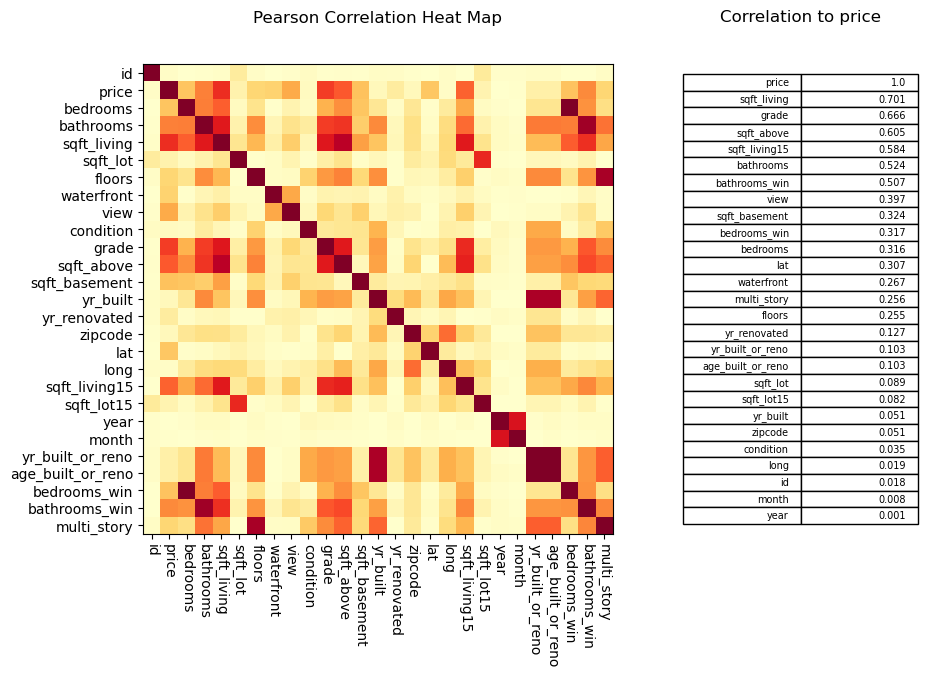

In [12]:
# Pearson correlation as heat map (abs value)

fig, ax = plt.subplots(1, 2, figsize=(10,7), gridspec_kw={'width_ratios': [2, 1]})

ax[0].imshow(df.corr().abs(), cmap='YlOrRd')
ax[0].set_xticks(np.arange(len(df.columns)),labels=df.columns, rotation = 270)
ax[0].set_yticks(np.arange(len(df.columns)),labels=df.columns)
ax[0].set_title('Pearson Correlation Heat Map', pad=30)

ax[1].axis('off')
ax[1].table(cellText=price_correlations.values, loc='center')
ax[1].set_title('Correlation to price')

plt.show()

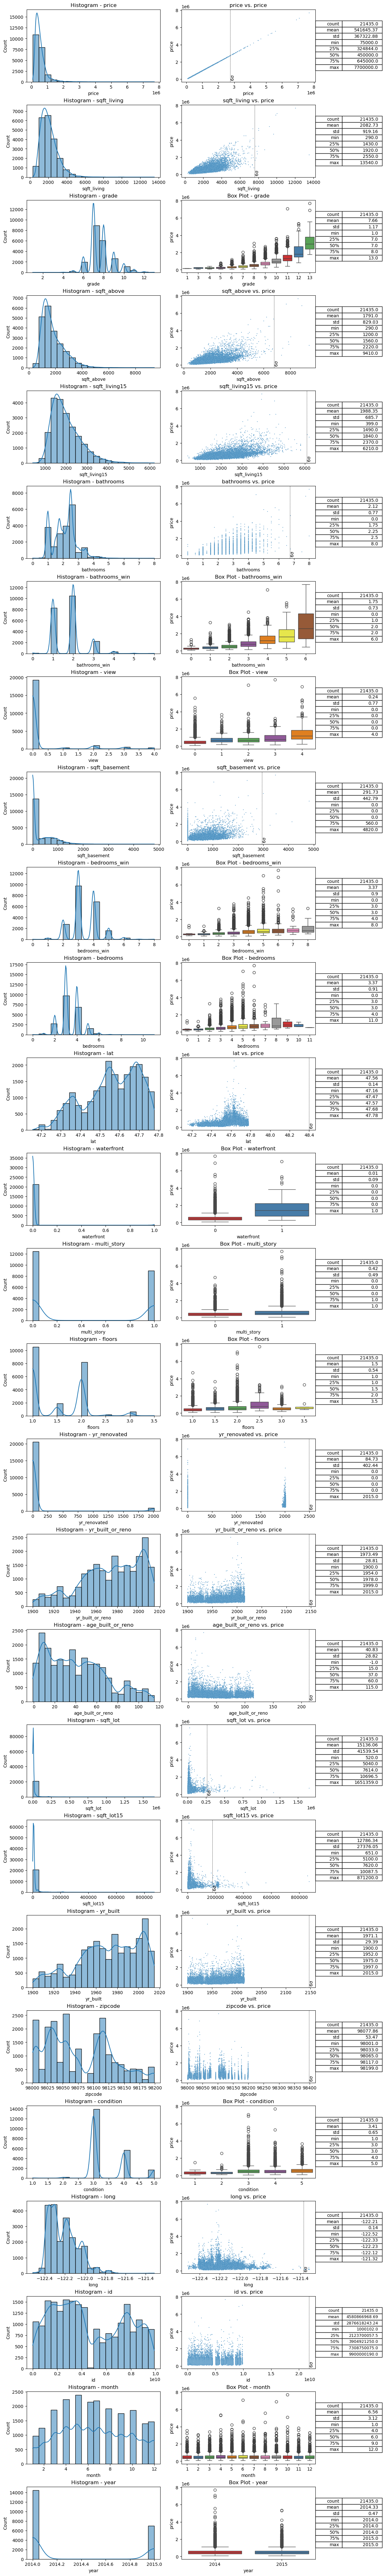

In [13]:
#Parameter Visualizations - Histogram, correlation to price, column stats

sd_view = 6                                                     # show sigma filtering parameter on plot
ordinal_def = 20                                                # control definition between continuous vs. ordinal treatment

i = 1                                                           # i iterates plt.subplot

plot_list = list(price_correlations['column'])
length = len(plot_list)

plt.figure(figsize=(12,3*length), layout='constrained')

for param in plot_list:
    # make histogram
    plt.subplot(length,2,i)
    sns.histplot(df[param], bins=20, kde=True)
    plt.title('Histogram - ' + param)
    i += 1  

    if df[param].nunique() < ordinal_def:                    
        # box plot for ordinal columns (then)
        plt.subplot(length,2,i)
        sns.boxplot(data=df, x=param, y="price", hue=param, palette='Set1', legend=False)
        plt.title('Box Plot - ' + param)
        
        # summary stat table
        plt.table(cellText=stats_df[['index', param]].values, loc='right', colWidths=[0.2,0.3])
        i += 1

    else:
        # correlation plot for continuous
        plt.subplot(length,2,i)
        sns.scatterplot(data=df, x=param, y='price', s=2)
        plt.title(param + ' vs. price')
        
        # summary stat table
        plt.table(cellText=stats_df[['index', param]].values, loc='right', colWidths=[0.2,0.3])
        
        # add sigma filter to viz
        sd_filter_thresh = stats_df.loc[1, param] + sd_view * stats_df.loc[2, param]
        plt.axvline(sd_filter_thresh, color='black', linestyle='--', linewidth=0.5)
        plt.text(sd_filter_thresh, 0 , str(sd_view) + chr(963), rotation=90)
        i += 1

plt.show()

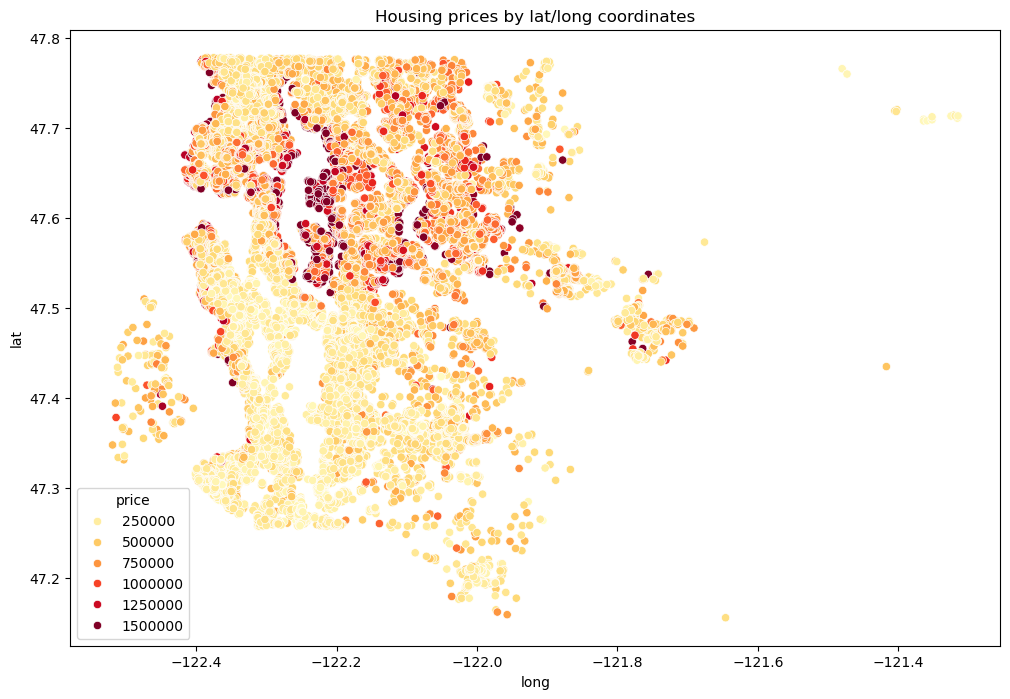

In [14]:
#simple map view using lat-long.

df_map = df.copy()
df_map['price'] = df_map['price'].where(df_map['price'] < 1500000, other=1500000)          #arbitary decision for plot clarity.

plt.figure(figsize=(12,8))
sns.scatterplot(data=df_map, x='long', y='lat', hue='price', palette='YlOrRd')
plt.title('Housing prices by lat/long coordinates')
plt.show()